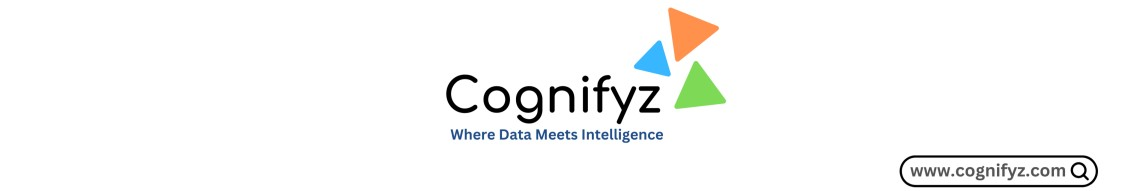

#### Outline🍔🥪
###### Table Booking and Online Delivery🔍
- Determine the percentage of restaurants that offer table booking and online delivery
- Compare the average ratings of restaurants with table booking and those without
- Analyze the availability of online delivery among restaurants with different price ranges.
##### Price Range Analysis🔍
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.
#####  Feature Engineering🔍
- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

- Restaurant ID
- Restaurant Name
- Country Code
- City
- Address	Locality
- Locality Verbose
- Longitude
- Latitude
- Cuisines
- Currency
- Has Table booking
- Has Online delivery
- Is delivering now
- Switch to order menu
- Price range
- Aggregate rating
- Rating color
- Rating text	Votes


# 👩🏻‍🍳"Dining by Numbers: Unveiling the Future of Restaurant Success"👨🏻‍🍳

### Level 2

`Task `

In [7]:
#import the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [8]:
#read the data using pandas librory(package)
df= pd.read_csv('Dataset .csv')

In [16]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


######  Determine the percentage of restaurants that offer table booking and online delivery.🔍
`Task 1.1`

In [22]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [146]:
 df[['Has Online delivery','City']].groupby(['Has Online delivery','City']).size().reset_index()


,Has Online delivery,City,0
0,No,Abu Dhabi,9
1,No,Agra,20
2,No,Ahmedabad,10
3,No,Albany,20
4,No,Allahabad,20
...,...,...,...
157,Yes,New Delhi,1489
158,Yes,Noida,364
159,Yes,Pune,7
160,Yes,Secunderabad,1


 If the columns contain values that are not directly convertible to Boolean 
(for example, 'Yes'/'No', 'Y'/'N', or any other non-standard representation), 
you'll need to first map or transform these values into Booleans:

In [147]:

df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})


In [148]:
#Using  pandas as pd
# Calculate the percentages
def calculate_percentages(df):
    total_restaurants = len(df)
    table_booking_percentage = (df['Has Table booking'].sum() / total_restaurants) * 100
    online_delivery_percentage = (df['Has Online delivery'].sum() / total_restaurants) * 100
    
    return table_booking_percentage, online_delivery_percentage

#print
table_booking_percentage, online_delivery_percentage = calculate_percentages(df)
print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


 
 calculating the percentages of restaurants offering and not offering table booking and online delivery services.  

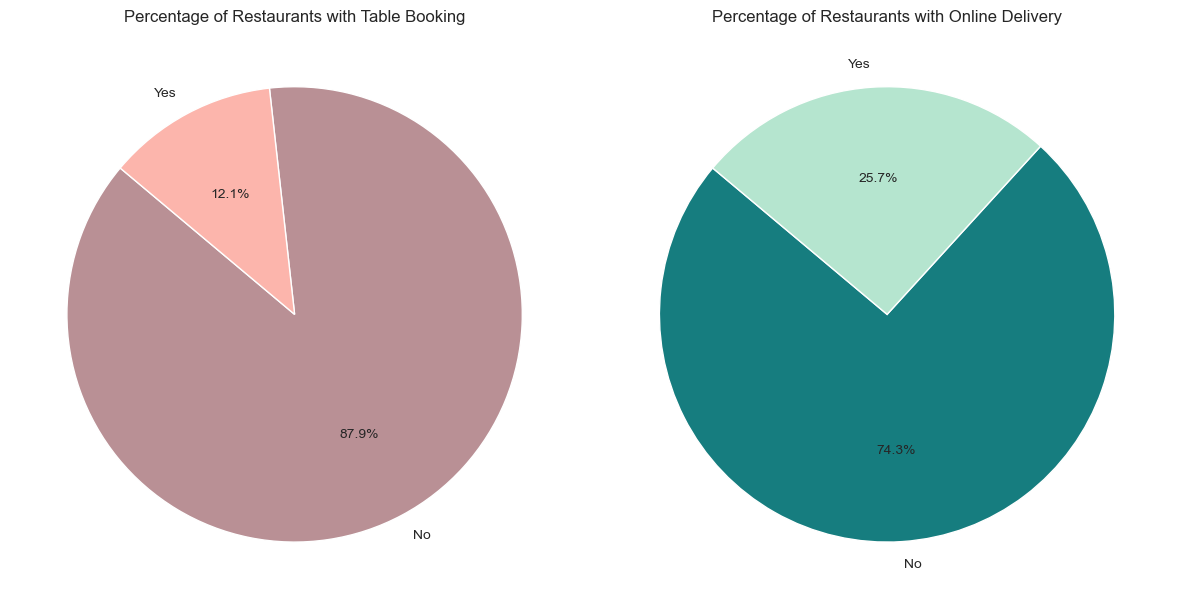

In [149]:
#  proportions
table_booking_counts = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100

# Pie chart for 'Has Table booking'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.pie(table_booking_counts, labels=['No', 'Yes'], colors=['#B99095', '#FCB5AC'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Restaurants with Table Booking')

# Pie chart for 'Has Online delivery'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.pie(online_delivery_counts, labels=['No', 'Yes'], colors=['#167D7F', '#B5E5CF'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Restaurants with Online Delivery')

plt.tight_layout()
plt.show()

##### Observation: 
- Percentage of restaurants offering $table __ booking$: 12.12% and not booking values are 87.9%
- Percentage of restaurants offering $online__ delivery$ : 25.66% and not delivering values are 74.3% 

##### Compare the average ratings of restaurants with table booking and those without 🔍
`Task 1.2`

In [150]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [151]:
# Calculate the average 'Aggregate rating' for restaurants with table booking
avg_rating_with_table_booking = df[df['Has Table booking'] == True]['Aggregate rating'].mean()#using mean 

# Calculate the average 'Aggregate rating' for restaurants without table booking
avg_rating_without_table_booking = df[df['Has Table booking'] == False]['Aggregate rating'].mean()

print(f"Average rating for restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


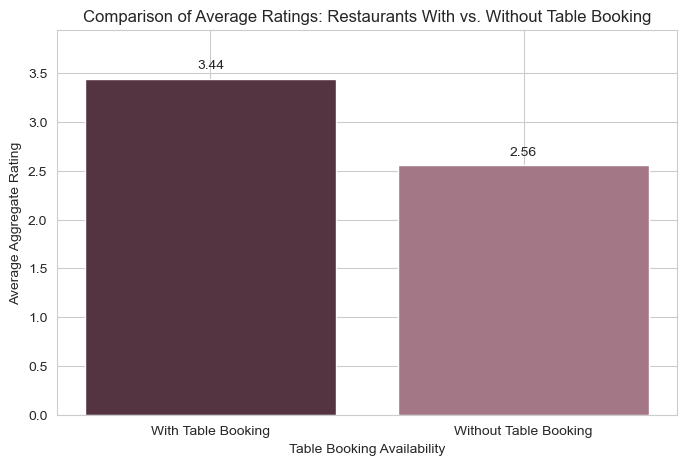

In [152]:
# Data for plotting
categories = ['With Table Booking', 'Without Table Booking']
averages = [avg_rating_with_table_booking, avg_rating_without_table_booking]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, averages, color=[ '#533440','#A47786'])
plt.xlabel('Table Booking Availability')
plt.ylabel('Average Aggregate Rating')
plt.title('Comparison of Average Ratings: Restaurants With vs. Without Table Booking')
plt.ylim(0, max(averages) + 0.5)  # Adjust the y-axis to make it a bit higher than the max average for better visualization


 #average values on top of the bars
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.1, f"{avg:.2f}", ha='center')

plt.show()

##### Observation
- with Table booking value is higher than without table booking  
- $with __table booking$ value 3.44
- $without __ table booking$ value is 2.56

#### Analyze the availability of online delivery among restaurants with different price ranges.🔍
`Task 1.3`

In [153]:

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [154]:
df[df['Has Online delivery']=='Yes'].City.value_counts()#i was converting variable type bool to int 

Series([], Name: count, dtype: int64)

In [155]:
df[df['Has Online delivery']==1].City.value_counts()

City
New Delhi       1489
Gurgaon          425
Noida            364
Faridabad         35
Chennai           13
Abu Dhabi         11
Sharjah           11
Ahmedabad         11
Ghaziabad         10
Nagpur            10
Jaipur            10
Kolkata            8
Pune               7
Mumbai             7
Hyderabad          7
Coimbatore         7
Bangalore          7
Dubai              6
Chandigarh         6
Kochi              5
Mohali             1
Secunderabad       1
Name: count, dtype: int64

In [156]:
if df.empty:
    print("DataFrame is empty.")
else:
    print("DataFrame has data.")
    # Further check for the specific columns involved in the plot
    print("Unique values in 'Has Online delivery':", df['Has Online delivery'].unique())
    print("Unique values in 'Price range':", df['Price range'].unique())

DataFrame has data.
Unique values in 'Has Online delivery': [False  True]
Unique values in 'Price range': [3 4 2 1]


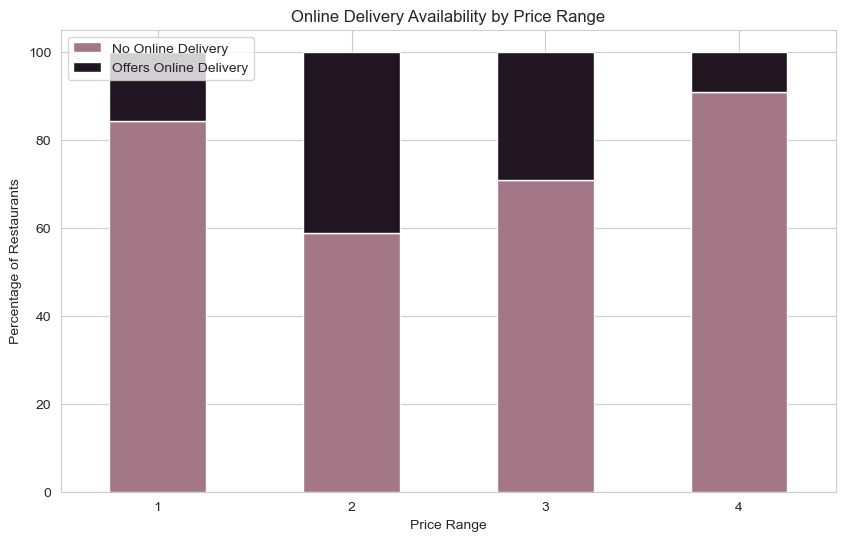

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
# Grouping the data by 'Price range' and calculating the count of restaurants offering online delivery
delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the analysis
delivery_by_price_range.plot(kind='bar', stacked=True, figsize=(10, 6),color=['#A47786', '#211522'])
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(['No Online Delivery', 'Offers Online Delivery'], loc='upper left')
plt.xticks(rotation=0)  # Keep the x-axis labels readable
plt.show()


#### Observation

- Highest $numbers __ of online delevery$ is between 0 to 95
- Highest $offers __ of online delivery$ is between 60 to 100

### Level 2
`Task 2.1`

 #### Price Range Analysis
  
  
##### Determine the most common price range among all the restaurants.🔍


In [158]:
#Using pandas lab
# Count the frequency of each unique price range value
price_range_counts = df['Price range'].value_counts()

# Find the most common price range
most_common_price_range = price_range_counts.idxmax()

print(f"The most common price range among all restaurants is: {most_common_price_range}")
print(f"Count: {price_range_counts.max()}")

# Optionally, the frequency of all price ranges
print("\n Frequency of each price range:")
print(price_range_counts)


The most common price range among all restaurants is: 1
Count: 4444

 Frequency of each price range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


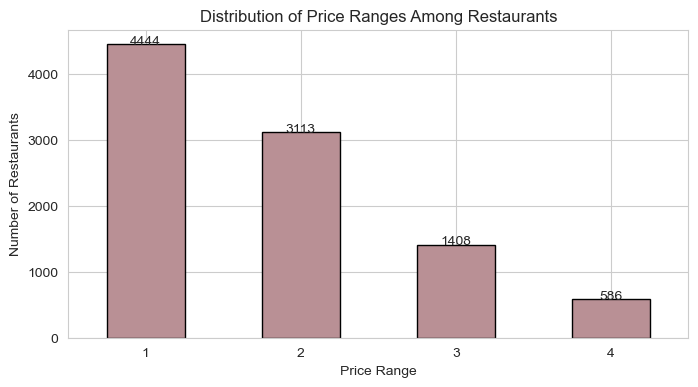

In [160]:
# Count the frequency of each unique price range value
price_range_counts = df['Price range'].value_counts().sort_index()

# Create a bar chart to visualize the distribution of price ranges
plt.figure(figsize=(8, 4))
price_range_counts.plot(kind='bar', color='#B99095', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability

# Optionally, add the count above each bar for clarity
for index, value in enumerate(price_range_counts):
    plt.text(index, value, str(value), ha='center')

plt.show()

`Task 2.2`
##### Calculate the average rating for each price range. 🔍

In [161]:
# Group the columns by 'Price range' and calculate the mean 'Aggregate rating' for each group
average_ratings_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Average Aggregate Rating by Price Range:")
print(average_ratings_by_price_range)


Average Aggregate Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [162]:
pivot_table = df.pivot_table(values='Aggregate rating', index='Price range', aggfunc='mean')
# Resetting index to convert the pivot table back into a DataFrame for  plotting
pivot_table_reset = pivot_table.reset_index()


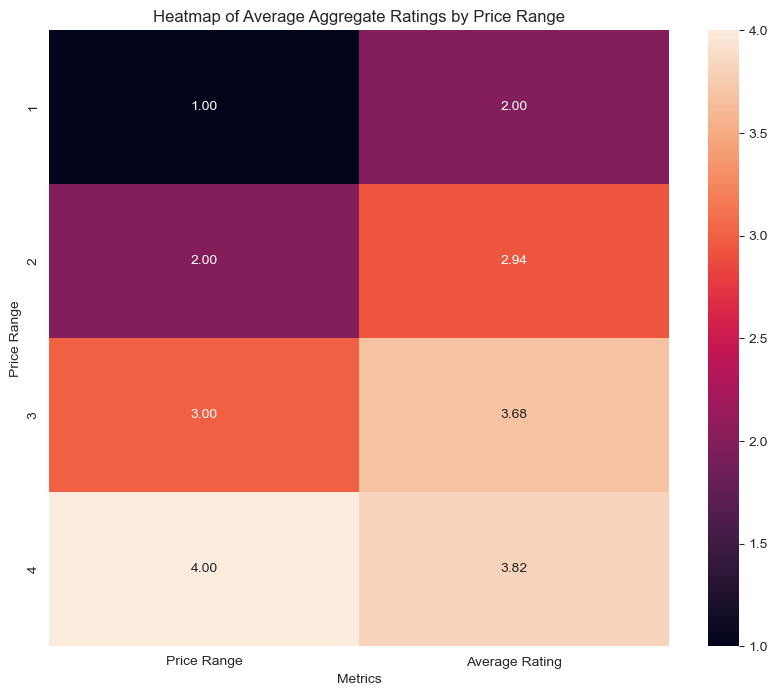

In [163]:
# Visualizing the average aggregate ratings for each price range using a heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table_reset, annot=True, fmt=".2f", cbar=True, xticklabels=['Price Range', 'Average Rating'], yticklabels=pivot_table_reset['Price range'])
plt.title('Heatmap of Average Aggregate Ratings by Price Range')
plt.ylabel('Price Range')
plt.xlabel('Metrics')
plt.show()

##### Obsrvation
- 1 value is giving dark color and higher value represeted is lighter shade 4
- 4 value is correlated is positively between price range and average Rating i
- 1 value is not correlated between   2 variables 


`Task 2.3`
###### Identify the color that represents the highest average rating among different price ranges. 🔍

In [164]:
#using pandas  Calculate the average 'Aggregate rating' for each 'Price range'
average_ratings_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Find the price range with the highest average rating
highest_avg_rating = average_ratings_by_price_range.max()
price_range_highest_avg = average_ratings_by_price_range.idxmax()

# Find the 'Rating color' associated with the highest average rating
rating_color_highest_avg = df[df['Price range'] == price_range_highest_avg]['Rating color'].mode()[0]

print(f"The price range with the highest average aggregate rating is:  {price_range_highest_avg} average rating of {highest_avg_rating:.2f}.")
print(f"The color representing the highest average aggregate rating in this price range is: {rating_color_highest_avg}.")


The price range with the highest average aggregate rating is:  4 average rating of 3.82.
The color representing the highest average aggregate rating in this price range is: Yellow.


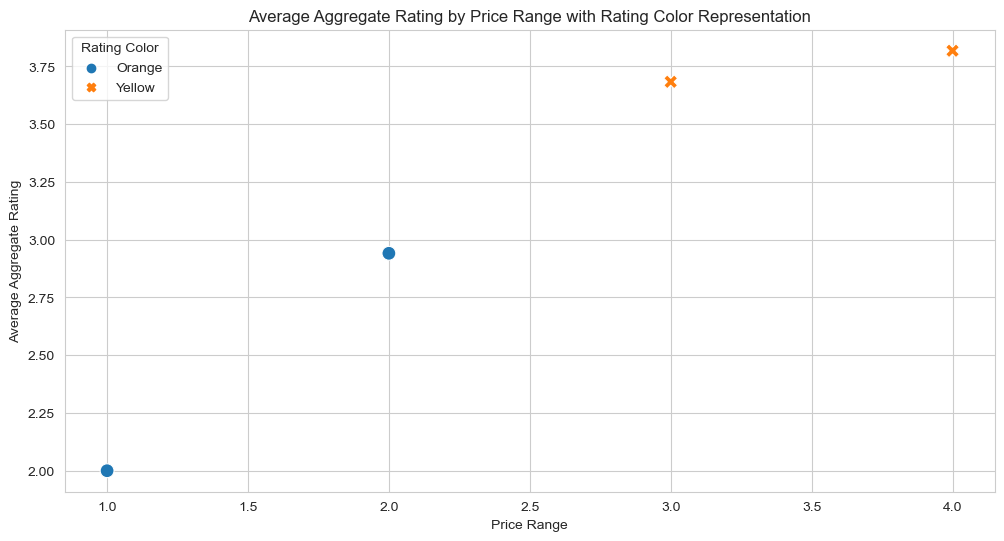

In [165]:
# Calculate the average 'Aggregate rating' for each 'Price range' and the most common 'Rating color'
price_range_stats = df.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]
}).reset_index()

# Dynamically create a color mapping based on unique 'Rating color' values in the DataFrame
unique_colors = price_range_stats['Rating color'].unique()
# Example dynamic color mapping (You may adjust the colors to better suit your data visualization needs)
dynamic_color_mapping = {color: plt.cm.tab10(i) for i, color in enumerate(unique_colors)}

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_range_stats, x='Price range', y='Aggregate rating', s=100,
                hue='Rating color', style='Rating color', palette=dynamic_color_mapping, legend='full')

plt.title('Average Aggregate Rating by Price Range with Rating Color Representation')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.grid(True)
plt.legend(title='Rating Color')
plt.show()



##### Observation

- The price range with the highest average aggregate rating is: 4, with an average rating of 3.82.
- The color representing the highest average aggregate rating in this price range is: Yellow.

### Level 2
`Task 3.1`

#### Feature Engineering

###### Extract additional features from the existing columns, such as the length of the restaurant name or address.🔍


In [166]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [167]:
import pandas as pd
df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(x))# Calculate the length of the restaurant name and add it as a new column
df['Address Length'] = df['Address'].apply(lambda x: len(x))# Calculate the length of the address and add it as a new column

In [168]:
print(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


<Figure size 1200x600 with 0 Axes>

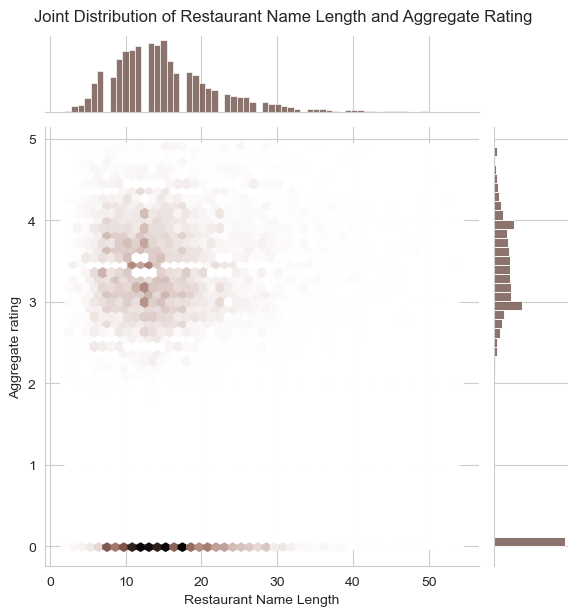

<Figure size 1200x600 with 0 Axes>

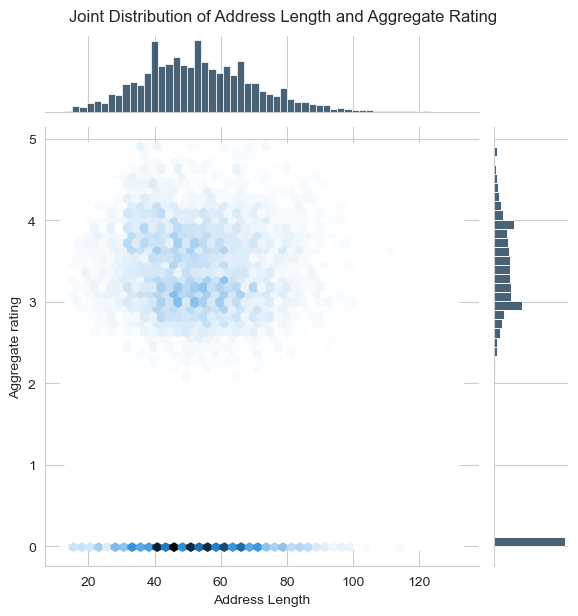

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Joint distribution plot for Restaurant Name Length and Aggregate Rating
plt.figure(figsize=(12, 6))
sns.jointplot(data=df, x='Restaurant Name Length', y='Aggregate rating',kind='hex',color='#65463E')
plt.suptitle('Joint Distribution of Restaurant Name Length and Aggregate Rating', y=1.02)
plt.show()
# Joint distribution plot for Address Length and Aggregate Rating
plt.figure(figsize=(12, 6))
sns.jointplot(data=df, x='Address Length', y='Aggregate rating', kind='hex', color='#0C2D48')
plt.suptitle('Joint Distribution of Address Length and Aggregate Rating', y=1.02)
plt.show()


##### Observation
- here its giving combine  bivariate and univariate this is 2 diffrent plots
- in middle figure giving scatter plots for Restaurant name length and agreegate ratings 
- scatterplot hexagonal binning  gives you the relationship between two variables ,
- in top the histogram gives in restaurant name length and  right side you can see the histogram of agreegate ratings 
- x is 'Restaurant Name Length' and agreegate length y is 'Aggregate rating'
- most of the data lies between in x 10 to 20 and in y  2.5 to 4.5 and other plot 40 to 60 and 2.5 to 4.5


##### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.🔍
`Task 3.2`

In [170]:
import pandas as pd

# Convert "Has Table booking" and "Has Online delivery" from categorical to binary (0s and 1s)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Verify the transformation by displaying the first few rows of the DataFrame
print(df[['Has Table Booking', 'Has Online Delivery']].head())


   Has Table Booking  Has Online Delivery
0                NaN                  NaN
1                NaN                  NaN
2                NaN                  NaN
3                NaN                  NaN
4                NaN                  NaN


In [171]:
print(df.shape)


(9551, 25)


In [172]:
print(df[['Has Table Booking', 'Has Online Delivery', 'Aggregate rating']].isna().sum())


Has Table Booking      9551
Has Online Delivery    9551
Aggregate rating          0
dtype: int64


In [173]:
df['Has Table Booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0}).fillna(0)
df['Has Online Delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0}).fillna(0)


In [174]:
# Option 1: Fill NaN values with the mean or median
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].mean())

# Option 2: Drop rows with NaN values in 'Aggregate rating'
df = df.dropna(subset=['Aggregate rating'])


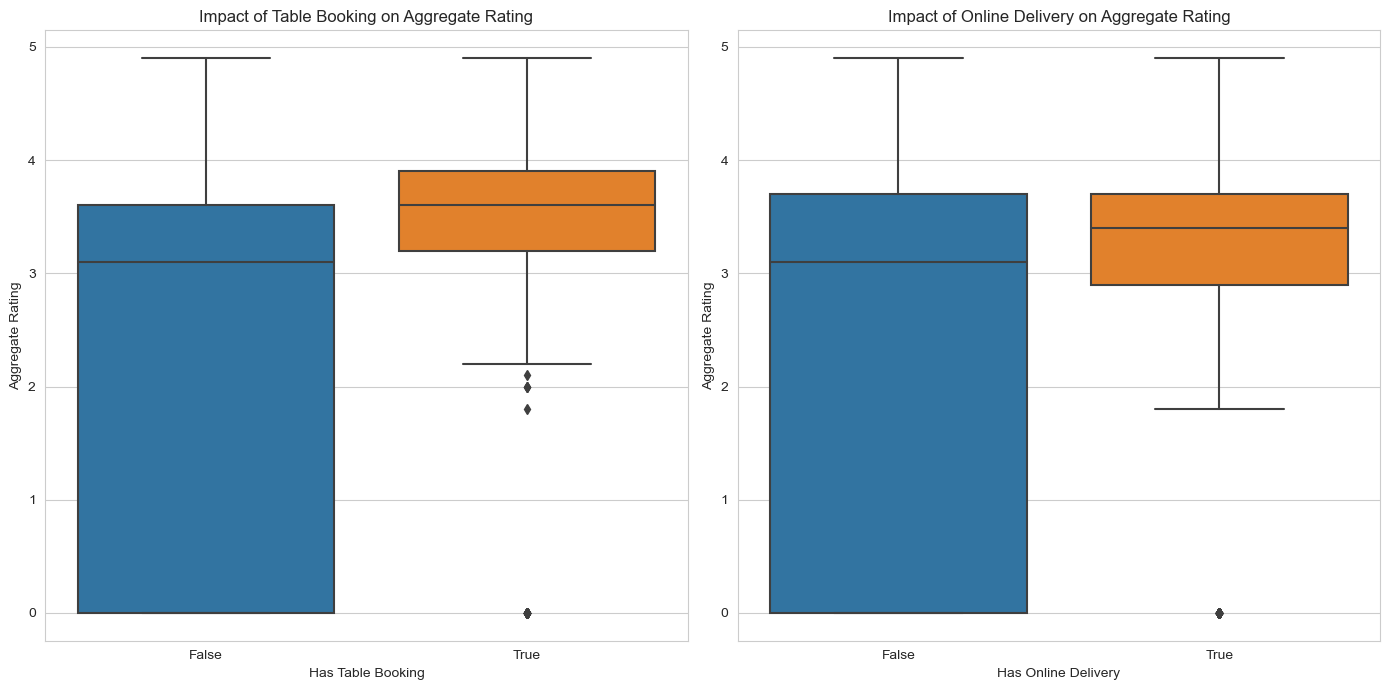

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(14, 7))

# Box plot for "Has Table Booking"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='Has Table Booking', y='Aggregate rating', data=df)
plt.title('Impact of Table Booking on Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')

# Box plot for "Has Online Delivery"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='Has Online Delivery', y='Aggregate rating', data=df)
plt.title('Impact of Online Delivery on Aggregate Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##### Observation 
- this is box plot or whisker plot
    - x axis  is a hash table booking column and y is agreegate rating column 
    - some set of data here for True and False 
    - bottom line represented lowest or minimum value top line reprenseted maximum value 
    - box bottom line represented Q1 and top line is Q3 and middle line is median 
    - 'Impact of Table Booking on Aggregate Rating
    - Impact of Online Delivery on Aggregate Rating
    -  points are represented is outlier
    

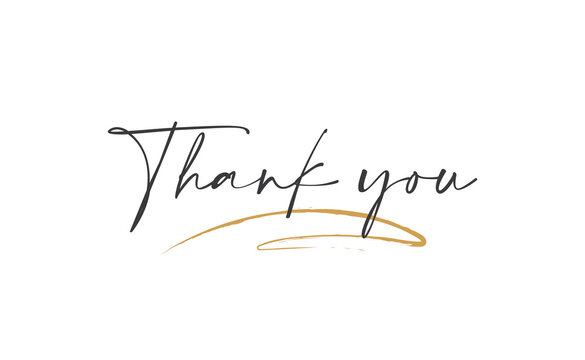